In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
labels = train["label"]
train = train.drop(labels = ["label"], axis = 1)

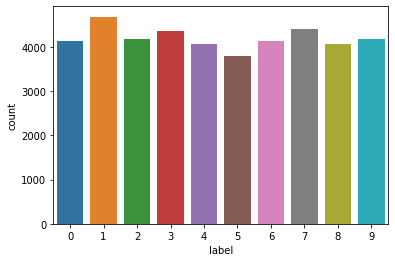

In [4]:
sns.countplot(labels)

In [5]:
train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
train = train/255
test = test/255

train = train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [8]:
from keras.utils import to_categorical
labels = to_categorical(labels, 10)

Using TensorFlow backend.


In [9]:
labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xcv, ytrain, ycv = train_test_split(train, labels, test_size = 0.1, random_state = 2)

7


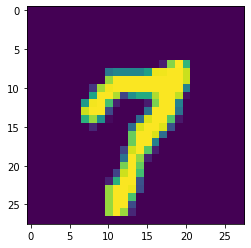

In [11]:
plt.imshow(xtrain[100][:,:,0])
print(ytrain[100].argmax())

In [0]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras import models

Modify the next 2 blocks of code!!!!!!!!!!

In [13]:
model = models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
from keras.optimizers import RMSprop
opti = RMSprop(lr = 0.001)
model.compile(optimizer = opti, loss = "categorical_crossentropy", metrics = ["accuracy"])

#history = model.fit(x = xtrain, y = ytrain, batch_size = 64, epochs = 5, validation_data = (xcv, ycv))

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1,
                             zoom_range = 0.1, horizontal_flip = False, vertical_flip = False)

datagen.fit(xtrain)

In [0]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
history = model.fit_generator(datagen.flow(x = xtrain, y = ytrain, batch_size = 64), 
                              epochs = 10, steps_per_epoch = xtrain.shape[0]//64,
                              validation_data = (xcv, ycv),
                              callbacks = [learning_rate_reduction])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





590/590 [==============================] - 270s 457ms/step - loss: 0.4275 - acc: 0.8657 - val_loss: 0.0735 - val_acc: 0.9771
Epoch 2/10
590/590 [==============================] - 271s 459ms/step - loss: 0.1716 - acc: 0.9515 - val_loss: 0.0552 - val_acc: 0.9833
Epoch 3/10
590/590 [==============================] - 272s 460ms/step - loss: 0.1350 - acc: 0.9605 - val_loss: 0.0494 - val_acc: 0.9883
Epoch 4/10
590/590 [==============================] - 270s 458ms/step - loss: 0.1267 - acc: 0.9655 - val_loss: 0.0409 - val_acc: 0.9883
Epoch 5/10
590/590 [==============================] - 269s 456ms/step - loss: 0.1231 - acc: 0.9689 - val_loss: 0.0379 - val_acc: 0.9883
Epoch 6/10
590/590 [==============================] - 269s 456ms/step - loss: 0.1301 - acc: 0.9693 - val_loss: 0.0526 - val_acc: 0.9862

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
E

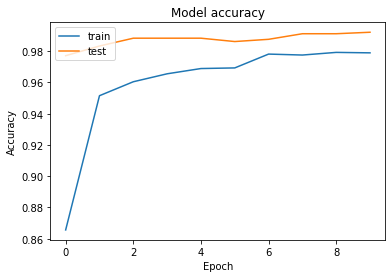

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Model accuracy")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

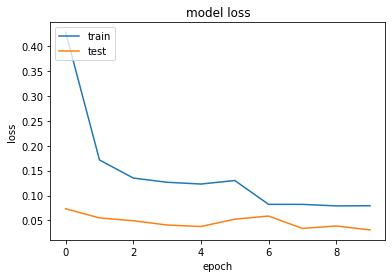

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
results = model.predict(test)
results = np.argmax(results, axis = 1)

In [0]:
pred = pd.Series(results, name = "Label")
pred = pd.concat([pd.Series(range(1,28001), name = "ImageId"), pred], axis = 1)
pred.to_csv("pred.csv", index = False)